MongoDB数据库及其界面化工具RoboMongo的安装和基本使用，并且爬取拉勾通过pymongo包把爬取到的数据存储在MongoDB数据库中。

## MongoDB：
### 1.什么是MongoDB
> MongoDB是一个高性能，开源，**无模式的文档型数据库 **:简单讲就是可以直接存json,list
> <br>
> MongoDB 将数据存储为一个文档，数据结构由键值(key=>value)对组成
> <br>
> MongoDB 是一个基于分布式文件存储的数据库是一个介于关系数据库和非关系数据库之间的产品，是非关系数据库当中功能最丰富，最像关系数据库的。


特点：
- 不用事先定义”表”,随时可以创建
- “表”中的数据长度可以不一样
    - 也就是第一条记录有10个值，第二条记录不要规定也要10个值
- 对爬虫这种很乱的数据来说，很适用 。

## MongoDB相关的安装
**Windows的安装方法(其他平台因为暂时用不到先略过）：**
[MongoDB及可视化工具的安装](https://zhuanlan.zhihu.com/p/29986675)

### 下载
MongoDB 下载地址：MongoDB 下载地址：[MongoDB Download Center](https://www.mongodb.com/download-center?jmp=tutorials#community)

### 安装 （一般安装到C盘方便）
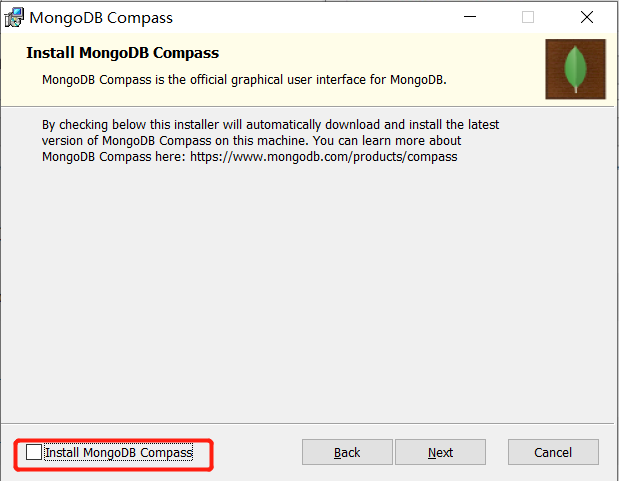
下一步安装 "install mongoDB compass" 不勾选，否则可能要很长时间都一直在执行安装，MongoDB Compass 是一个图形界面管理工具，我们可以在后面自己到官网下载安装，下载地址：https://www.mongodb.com/download-center/compass。

### 配置 MongoDB 服务
#### 更改数据目录(数据库文件的存放位置)
MongoDB将数据目录存储在 db 目录下。但是这个数据目录不会主动创建，我们在安装完成后需要创建它。请注意，数据目录应该放在根目录下（(如： C:\ 或者 D:\ 等 )。
<br>
在本教程中，我们已经在 C 盘安装了 mongodb，现在让我们在D盘创建一个 data 的目录, 然后在 data 目录里创建 db 目录。
<br>

cd d:
mkdir D:\Data\MongoDB\data\db
<br>
mkdir D:\Data\MongoDB\data\log\MongoDB.log

然后打开终端，来到MongoDB的bin目录下
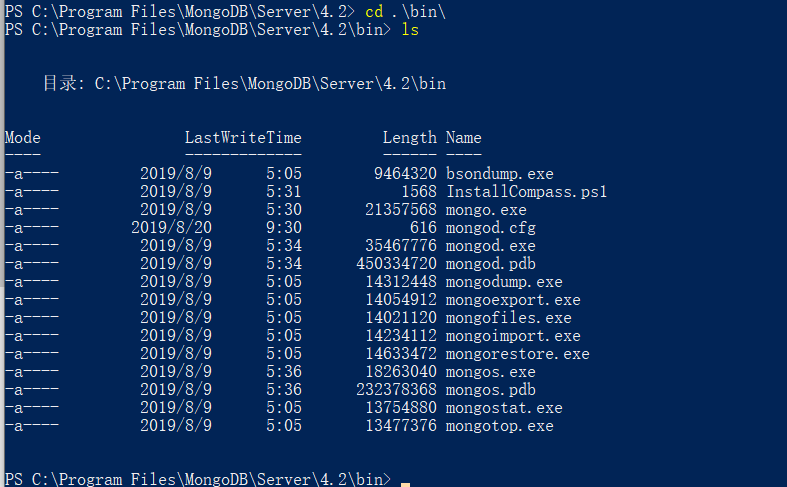
，输入:

 .\mongod --dbpath "D:\Data\MongoDB\data\db"  # 指定数据库文件保存路径


#### 更改日志目录位置
mongod --dbpath "D:\Data\MongoDB\log\mongod.log"

#### 创建配置文件
建一个配置文件。该文件必须设置 systemLog.path 参数，包括一些附加的配置选项更好。

例如，修改一个配置文件位于 C:\Program Files\MongoDB\Server\4.2\bin，其中指定 systemLog.path 和 storage.dbPath。具体配置内容如下：

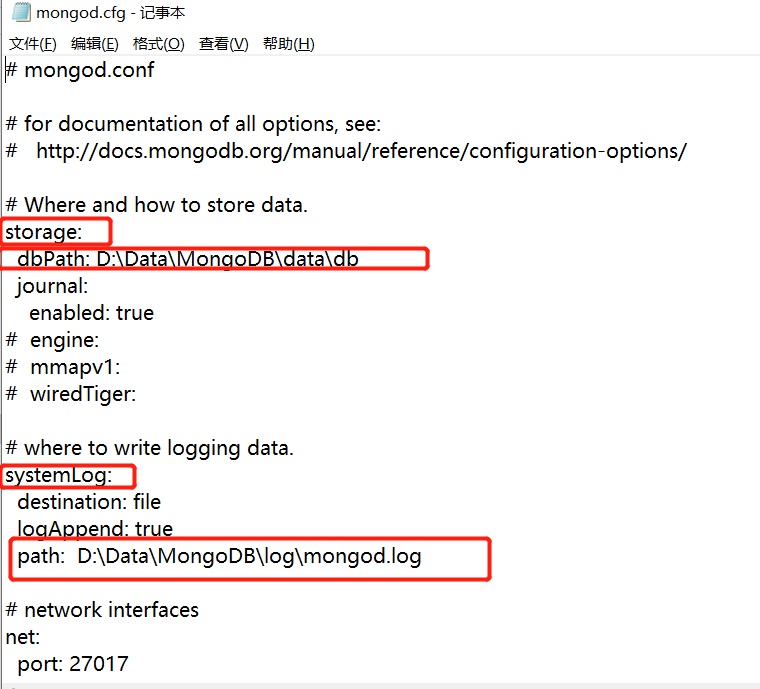
小技巧：
- 做好原文件备份
- 复制一份配置文件到桌面修改完再覆盖原本的配置文件

### 安装 MongoDB服务 (将MongoDB服务器作为Windows服务运行) 

**必须以管理员模式打开cmd或者PowerShell**  (PS:这里补充下如何管理员身份运行，在C盘中找到 cmd.exe ，右键——以管理员身份运行）

通过执行mongod.exe，使用--install选项来安装服务，使用--config选项来指定之前创建的配置文件。  

> C:\Program Files\MongoDB\Server\4.2\bin\mongod.exe --config "C:\mongodb\mongod.cfg" --install ----serviceName "MongoDB"

要使用备用 dbpath，可以在配置文件（例如：C:\mongodb\mongod.cfg）或命令行中通过 --dbpath 选项指定。

如果需要，您可以安装 mongod.exe 或 mongos.exe 的多个实例的服务。只需要通过使用 --serviceName 和 --serviceDisplayName 指定不同的实例名。只有当存在足够的系统资源和系统的设计需要这么做。

**启动MongoDB服务**
> net start MongoDB

**关闭MongoDB服务**
> net stop MongoDB

**移除 MongoDB 服务**
> C:\Program Files\MongoDB\Server\4.2\bin\mongod.exe --remove

命令行下运行 **MongoDB 服务器** 和 **配置 MongoDB 服务** 任选一个方式启动就可以。

**打开 http://127.0.0.1:27017/ ，发现如下提示：**

> It looks like you are trying to access MongoDB over HTTP on the native driver port.

### [MongoDB 后台管理 Shell](https://www.runoob.com/mongodb/mongodb-window-install.html)

如果你需要进入MongoDB后台管理，你需要先打开mongodb装目录的下的bin目录，然后执行mongo.exe文件，MongoDB Shell是MongoDB自带的交互式Javascript shell,用来对MongoDB进行操作和管理的交互式环境。

当你进入mongoDB后台后，它默认会链接到 test 文档（数据库）：

### 可视化工具
[Robomongo](https://robomongo.org/download)
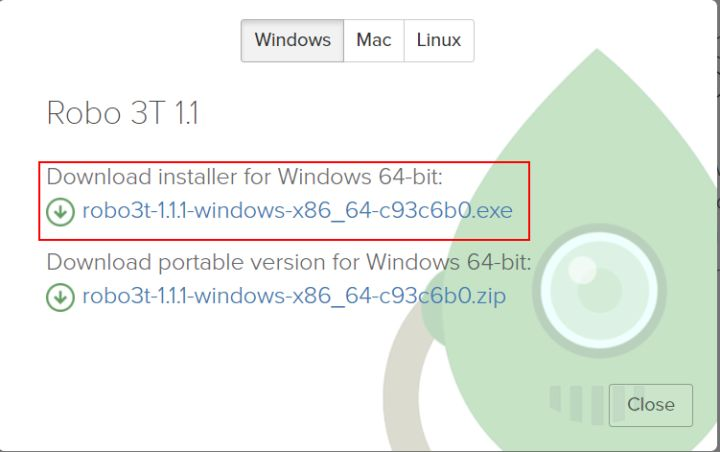

一路next安装完成打开，新建连接，默认配置就可以
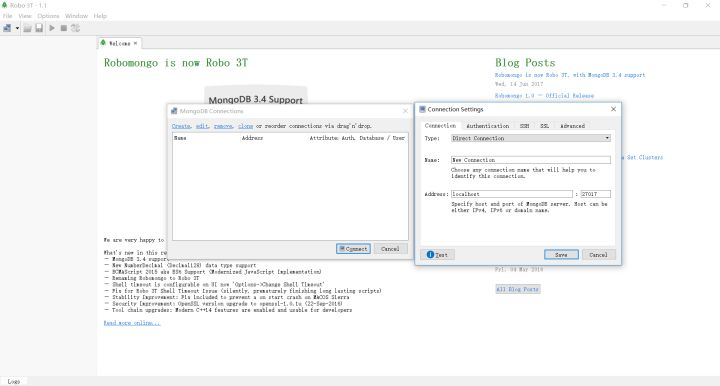

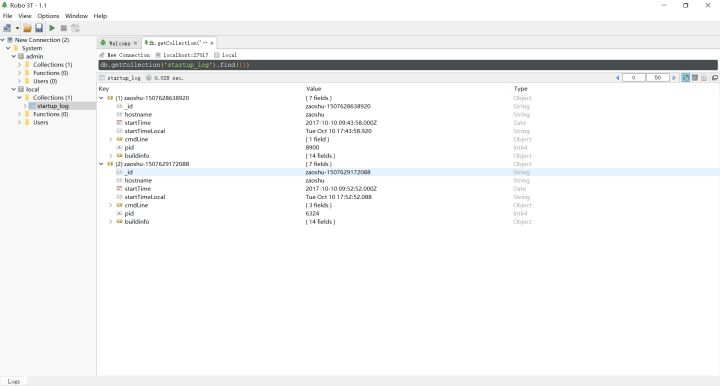
到目前为止，所有的MongoDB、可视化工具安装已经完成

### MongoDB在Python中的基本使用
通过一个简单的例子展示使用pymongo连接MongoDB数据库，并插入数据:

In [2]:
#! /usr/bin/env python
# -*- coding:utf-8 -*-

from pymongo import MongoClient

client = MongoClient()
db = client.test #连接test数据库，没有则自动创建(选择数据库)
my_set = db.set #使用set集合，没有则自动创建(选择集合)
my_set.insert({'name':'Robin', 'age':'24'}) #插入一条数据
# 插入的数据可在MongoDB的test数据库的set集合中找到 

D:\App\Python3\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  if __name__ == '__main__':


ObjectId('5d5be5887ce772f162eb4503')

## 项目实例
爬取拉勾网有关“爬虫”的职位信息，并把爬取的数据存储在MongoDB数据库中

- 首先前往[拉勾网“爬虫”职位](https://www.lagou.com/jobs/list_%E7%88%AC%E8%99%AB?labelWords=&fromSearch=true&suginput=)相关页面
- 确定网页的加载方式是JavaScript加载
- 通过谷歌浏览器开发者工具分析和寻找网页的真实请求，确定真实数据在position.Ajax开头的链接里，请求方式是POST
- 使用requests的post方法获取数据，发现并没有返回想要的数据，说明需要加上headers
- 加上headers的’Cookie’，’User-Agent’，’Referer’等信息，成功返回数据
- 再把返回的对应数据存储到MongoDB

**1. 爬取单页数据**

In [92]:
#! /usr/bin/env python
# -*- coding:utf-8 -*-

import requests
from pymongo import MongoClient

client = MongoClient()  # 实例化一个MongoClient对象
db = client.lagou #创建一个lagou数据库
my_set = db.job #创建job集合

url = 'https://www.lagou.com/jobs/positionAjax.json?needAddtionalResult=false'
payload = {
    'first': 'true',
    'pn': '1',
    'kd': '爬虫'
}

headers = {#cookie必须要用首页的cookie，不能用Ajax的Cookie
    'Cookie': 'user_trace_token=20190514110044-43162031-23d4-4ddb-b07f-eca68d4c82ce; _ga=GA1.2.1000156819.1557802850; LGUID=20190514110048-795f3cba-75f4-11e9-9f4a-5254005c3644; JSESSIONID=ABAAABAAAGGABCBFCE2BEE05874C1A3CD46D269098E4A46; WEBTJ-ID=20190820225340-16caf84f00828a-0cfb5707b7c968-7373e61-1327104-16caf84f009663; _gid=GA1.2.1716462049.1566312824; X_MIDDLE_TOKEN=bde9265971546dda9961b25978eb458e; _putrc=33261683A845E0C4; login=true; unick=%E7%BD%97%E6%B5%A9%E5%BD%AC; gate_login_token=394a571c234cf7835dea703120cbff9b787acc5692186e44; showExpriedIndex=1; showExpriedCompanyHome=1; showExpriedMyPublish=1; hasDeliver=0; privacyPolicyPopup=false; TG-TRACK-CODE=index_search; Hm_lvt_4233e74dff0ae5bd0a3d81c6ccf756e6=1566354880,1566355059,1566355606,1566356018; index_location_city=%E5%B9%BF%E5%B7%9E; _gat=1; LGSID=20190821113649-e8b1ef26-c3c4-11e9-8b0b-525400f775ce; PRE_UTM=; PRE_HOST=; PRE_SITE=https%3A%2F%2Fwww.lagou.com%2F; PRE_LAND=https%3A%2F%2Fwww.lagou.com%2Fjobs%2Flist_%25E7%2588%25AC%25E8%2599%25AB%3FlabelWords%3D%26fromSearch%3Dtrue%26suginput%3D; SEARCH_ID=6fc1810f8e464930aa16a1d56d3ae64d; X_HTTP_TOKEN=bd6273c9d7404c9d578853665112b765c126ba3e8d; Hm_lpvt_4233e74dff0ae5bd0a3d81c6ccf756e6=1566358877; LGRID=20190821114115-8702a0f4-c3c5-11e9-8b0b-525400f775ce',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36',
    'Referer':'https://www.lagou.com/jobs/list_%E7%88%AC%E8%99%AB?labelWords=&fromSearch=true&suginput='
  
}

r = requests.post(url, data=payload, headers=headers)  #使用POST方法请求数据，加上payload和headers信息
my_set.insert(r.json()['content']['positionResult']['result']) #把对应的数据插入保存到MongoDB对应数据库的数据集合里

D:\App\Python3\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


[ObjectId('5d5cbfdb7ce772f162eb4505'),
 ObjectId('5d5cbfdb7ce772f162eb4506'),
 ObjectId('5d5cbfdb7ce772f162eb4507'),
 ObjectId('5d5cbfdb7ce772f162eb4508'),
 ObjectId('5d5cbfdb7ce772f162eb4509'),
 ObjectId('5d5cbfdb7ce772f162eb450a'),
 ObjectId('5d5cbfdb7ce772f162eb450b'),
 ObjectId('5d5cbfdb7ce772f162eb450c'),
 ObjectId('5d5cbfdb7ce772f162eb450d'),
 ObjectId('5d5cbfdb7ce772f162eb450e'),
 ObjectId('5d5cbfdb7ce772f162eb450f'),
 ObjectId('5d5cbfdb7ce772f162eb4510'),
 ObjectId('5d5cbfdb7ce772f162eb4511'),
 ObjectId('5d5cbfdb7ce772f162eb4512'),
 ObjectId('5d5cbfdb7ce772f162eb4513')]

**2.爬取多页：**
- 安装fake_useragent包：
> pip install fake_useragent

- 定义一个函数爬取多页的数据；使用fake-Agent包随机选取User-Agent

In [123]:
#! /usr/bin/env python
# -*- coding:utf-8 -*-

import requests
from pymongo import MongoClient
import time
from fake_useragent import UserAgent

client = MongoClient()  # 实例化一个MongoClient对象
db = client.lagou #创建一个lagou数据库
lagou = db.python #创建集合

headers = {#cookie必须要用首页的cookie，不能用Ajax的Cookie
    'Cookie': 'user_trace_token=20190514110044-43162031-23d4-4ddb-b07f-eca68d4c82ce; _ga=GA1.2.1000156819.1557802850; LGUID=20190514110048-795f3cba-75f4-11e9-9f4a-5254005c3644; JSESSIONID=ABAAABAAAGGABCBFCE2BEE05874C1A3CD46D269098E4A46; WEBTJ-ID=20190820225340-16caf84f00828a-0cfb5707b7c968-7373e61-1327104-16caf84f009663; _gid=GA1.2.1716462049.1566312824; X_MIDDLE_TOKEN=bde9265971546dda9961b25978eb458e; _putrc=33261683A845E0C4; login=true; unick=%E7%BD%97%E6%B5%A9%E5%BD%AC; gate_login_token=394a571c234cf7835dea703120cbff9b787acc5692186e44; showExpriedIndex=1; showExpriedCompanyHome=1; showExpriedMyPublish=1; hasDeliver=0; privacyPolicyPopup=false; index_location_city=%E5%B9%BF%E5%B7%9E; Hm_lvt_4233e74dff0ae5bd0a3d81c6ccf756e6=1566355059,1566355606,1566356018,1566367583; sensorsdata2015jssdkcross=%7B%22distinct_id%22%3A%2216cb2c8c2df887-0cf7b477d80533-7373e61-1327104-16cb2c8c2e0769%22%2C%22%24device_id%22%3A%2216cb2c8c2df887-0cf7b477d80533-7373e61-1327104-16cb2c8c2e0769%22%7D; sajssdk_2015_cross_new_user=1; LG_LOGIN_USER_ID=bbfdba4fde2110b521a400d632638c53fe002ab3dee71e0b; LG_HAS_LOGIN=1; SEARCH_ID=c86bddb4435648088522dd6b2867586d; TG-TRACK-CODE=search_code; X_HTTP_TOKEN=bd6273c9d7404c9d440583665112b765c126ba3e8d; Hm_lpvt_4233e74dff0ae5bd0a3d81c6ccf756e6=1566385047; _gat=1; LGSID=20190821185724-753cf28c-c402-11e9-a503-5254005c3644; PRE_UTM=; PRE_HOST=; PRE_SITE=; PRE_LAND=https%3A%2F%2Fwww.lagou.com%2F; LGRID=20190821185724-753cf3db-c402-11e9-a503-5254005c3644',
    'Referer':'https://www.lagou.com/jobs/list_%E7%88%AC%E8%99%AB?labelWords=&fromSearch=true&suginput=' 
}

def get_job_info(page, kd): #加入一个职位参数kd
    for i in range(page):
        url = 'https://www.lagou.com/jobs/positionAjax.json?needAddtionalResult=false&isSchoolJob=0'
        payload = {
            'first': 'true',
            'pn': i,
            'kd': kd
        }

        ua = UserAgent() 
        headers['User-Agent'] = ua.random #使用fake-Agent随机生成User-Agent，添加到headers
        r = requests.post(url, data=payload, headers=headers)  #使用POST方法请求数据，加上payload和headers信息
        
        if r.status_code == 200:
            job_json = r.json()['content']['positionResult']['result']
            lagou.insert(job_json) #把对应的数据插入保存到MongoDB对应数据库的数据集合里
        else:
            print("Something Wrong!")

        print('正在爬取' + str(i+1) +'页的数据...')
        time.sleep(3)
    
if __name__ == '__main__':
    get_job_info(10,'Python') #爬取前3页的职位信息

D:\App\Python3\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


正在爬取1页的数据...
正在爬取2页的数据...
正在爬取3页的数据...
正在爬取4页的数据...
正在爬取5页的数据...


KeyError: 'content'